# Google Play Store Data 
### Complete EDA Analysis

## About Dataset

- Context
    While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

- Content
    Each app (row) has values for catergory, rating, size, and more.

- Acknowledgements
    This information is scraped from the Google Play Store. This app information would not be available without it.

- Inspiration
    The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

## 1. Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Data Loading, Exploration and Cleaning 
- Load the csv file with the pandas

- Creating the dataframe and understanding the data present in the dataset using pandas

- Dealing with the missing data, outliers and the incorrect records

In [5]:
df = pd.read_csv('data.csv')

- Let's look at the top 5 rows of the data

In [6]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
# set options to me maxximum for rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#hide all warnings
import warnings
warnings.filterwarnings('ignore')

In [16]:
print(f"The names of columns in this dataset are as follows: {df.columns}")

The names of columns in this dataset are as follows: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [15]:
print(f"The number of rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The number of rows are 10841, and columns are 13.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [9]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


# how to make size a numeric column?

In [10]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

---
### Observations: 

1. "Varies with device"
2. M (Million)
3. k (Thousand)
---

In [12]:
df['Size'].isnull().sum()

0

- No missing values in size, we are good to go

Verify the number of values and 3 different kinds of values

In [17]:
# find the values having M in them
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8830

In [18]:
# find the values having k in them
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [20]:
# find the values with Varies with device
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [22]:
8830+316+1695
# the sum of all three categories is same as number of rows in df, therefore no value has been missed

10841

In [24]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
5                      5.6M
6                       19M
7                       29M
8                       33M
9                      3.1M
10                      28M
11                      12M
12                      20M
13                      21M
14                      37M
15                     2.7M
16                     5.5M
17                      17M
18                      39M
19                      31M
20                      14M
21                      12M
22                     4.2M
23                     7.0M
24                      23M
25                     6.0M
26                      25M
27                     6.1M
28                     4.6M
29                     4.2M
30                     9.2M
31                     5.2M
32                      11M
33                      11M
34                     4.2M
35                  

In [23]:
# convert the whole size column into bytes

#let's define a function 

def convert_size(size):
    if isinstance(size, str): #checking whether size is of string datatype
        if 'k' in size:
            return float(size.replace('k', "")) * 1024 #replacing k with nothing(removing k) and changing it to kilobytes by multiplying it with 1024 
        elif 'M' in size:
            return float(size.replace('M', "")) * 1024 *1024 #replacing M with nothing(removing k) and changing it to kilobytes by multiplying it with 1024
        elif 'Varies with device' in size:
            return np.nan #replacing Varies with device with null and returning null
    return size

In [25]:
# let's apply this function
df['Size'] = df['Size'].apply(convert_size) #apply function used to apply convert_size function to each and every entry in the Size series

In [26]:
df['Size']

0         19922944.0
1         14680064.0
2          9122611.2
3         26214400.0
4          2936012.8
5          5872025.6
6         19922944.0
7         30408704.0
8         34603008.0
9          3250585.6
10        29360128.0
11        12582912.0
12        20971520.0
13        22020096.0
14        38797312.0
15         2831155.2
16         5767168.0
17        17825792.0
18        40894464.0
19        32505856.0
20        14680064.0
21        12582912.0
22         4404019.2
23         7340032.0
24        24117248.0
25         6291456.0
26        26214400.0
27         6396313.6
28         4823449.6
29         4404019.2
30         9646899.2
31         5452595.2
32        11534336.0
33        11534336.0
34         4404019.2
35         9646899.2
36        25165824.0
37               NaN
38        11534336.0
39         9856614.4
40        15728640.0
41        10485760.0
42               NaN
43         1258291.2
44        12582912.0
45        25165824.0
46        27262976.0
47         83

In [27]:
df.rename(columns={'Size' : "Size_in_bytes"}, inplace=True)

In [30]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [29]:
# creating a new column using the lambda function(takes one or more arguments and returns a value)
df['Size_in_Mb'] = df ['Size_in_bytes'].apply(lambda x: x/(1024*1024))

# Let's take care of installs

In [31]:
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [32]:
df['Installs'].isnull().sum()

0

# Installs Column:
1. remove + sign
2. remove ,
3. Convert column into int datatype

In [33]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+',"") if '+' in str(x) else x)

In [39]:
df['Installs'].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

In [35]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',',"") if ',' in str(x) else x)

In [38]:
df['Installs']

0             10000
1            500000
2           5000000
3          50000000
4            100000
5             50000
6             50000
7           1000000
8           1000000
9             10000
10          1000000
11          1000000
12         10000000
13           100000
14           100000
15             5000
16           500000
17            10000
18          5000000
19         10000000
20           100000
21           100000
22           500000
23           100000
24            50000
25            10000
26           500000
27           100000
28            10000
29           100000
30           100000
31            50000
32           100000
33           100000
34            10000
35           100000
36           500000
37          5000000
38            10000
39           500000
40            10000
41           100000
42         10000000
43           100000
44            10000
45         10000000
46           100000
47           100000
48           100000
49           100000


In [37]:
df['Installs'] = df['Installs'].apply(lambda x: int(x))
#or df['Installs'] = int(df['Installs'])

- We can generate new columns based on the installation values, which will be helpful in our analysis.

In [57]:
# Binning
#making new column called "installs_category" which will have the category of the installs
#bins will define the range for segmentation [-1,0],(0,10],(10,1000],.......
#labels specifies the labels for returned bins
bins= [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels = ['No', 'Very Low', 'Low', 'Moderate', 'More than Moderate', 'High', 'Very High', 'Top Notch']
df['Installs_Category'] = pd.cut(df['Installs'], bins = bins, labels = labels)

In [60]:
df['Installs_Category'].value_counts() #check the value counts of the new column

Low                   2162
High                  2118
Very High             2004
More than Moderate    1648
Moderate              1531
Top Notch              828
Very Low               535
No                      15
Name: Installs_Category, dtype: int64

# Price Column

In [61]:
#check unique vaues in Price column
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [40]:
df['Price'].value_counts()

0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$24.99         7
$3.49          7
$7.99          7
$5.49          6
$19.99         6
$11.99         5
$6.49          5
$12.99         5
$8.99          5
$10.00         3
$16.99         3
$1.00          3
$2.00          3
$13.99         2
$8.49          2
$17.99         2
$1.70          2
$3.95          2
$79.99         2
$7.49          2
$9.00          2
$10.99         2
$39.99         2
$33.99         2
$1.96          1
$19.40         1
$4.80          1
$3.28          1
$4.59          1
$15.46         1
$3.04          1
$4.29          1
$2.60          1
$2.59          1
$3.90          1
$154.99        1
$4.60          1
$28.99         1
$2.95          1
$2.90          1
$1.97          1
$200.00        1
$89.99         1
$2.56         

In [42]:
# find the number of values that have $ and remove $
df['Price'].loc[df['Price'].str.contains('$')].value_counts().sum()

10841

In [45]:
# The number of entries in Price column which contain 0 but don't contain '$'
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('/$'))].value_counts().sum()

10224

In [46]:
# remove the dollar sign from the price column and convert it to numeric
df['Price']= df['Price'].apply(lambda x: x.replace('$',"") if '$' in str(x) else x)

In [47]:
df['Price'].value_counts()

0         10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
24.99         7
3.49          7
7.99          7
5.49          6
19.99         6
11.99         5
6.49          5
12.99         5
8.99          5
10.00         3
16.99         3
1.00          3
2.00          3
13.99         2
8.49          2
17.99         2
1.70          2
3.95          2
79.99         2
7.49          2
9.00          2
10.99         2
39.99         2
33.99         2
1.96          1
19.40         1
4.80          1
3.28          1
4.59          1
15.46         1
3.04          1
4.29          1
2.60          1
2.59          1
3.90          1
154.99        1
4.60          1
28.99         1
2.95          1
2.90          1
1.97          1
200.00        1
89.99         1
2.56          1
1.20          1
1.26          1
30.99         1
3.61    

In [48]:
# Changing Datatype of 'Price' to float
df['Price']= df['Price'].apply(lambda x: float(x))

In [63]:
df['Price'].dtype #checking whether dataype has changed to float

dtype('float64')

In [56]:
# using f string print min,max and avg prices of the apps
print(f"Min Price is {df['Price'].min()}")
print(f"Max Price is {df['Price'].max()}")
print(f"Avg Price is {df['Price'].mean()}")

Min Price is 0.0
Max Price is 400.0
Avg Price is 1.0272733142699015


# 2.1 Descriptive Statistics

In [50]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


# Observations: 
---
- Now, we have only 6 columns as numeric datatype.
- We can observe their descriptive statistics and derive tons of conclusions based on our inference of the data.
- We can see that the min and max values of 'Rating' are 1 and 5, which are correct and the mean in 4.19 which is a good rating.
- We can see the range of reviews is from 0 to 78 million+ and the average is 444,111.9 which is a good number but is of no use to us as we don't get a category-wise bifercation of average number of reviews.
- Similarly, we can observe other number of reviews. 

Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and the number of installs, reviews, ratings, etc.

## But, even before that we have think about the missing  values in the dataset

# 2.2 Dealing with the missing values
Dealing with missing values is one of the most important part of the data wrangling process, we must deal with the missing values to get the correct insights from the data.
- Let's have a look at the missing values in the dataset

In [52]:
# Missing Values inside the Dataframe
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes     1695
Size_in_Mb        1695
Rating            1474
Current Ver          8
Android Ver          2
Category             1
Type                 1
Genres               1
App                  0
Reviews              0
Installs             0
Price                0
Content Rating       0
Last Updated         0
dtype: int64

In [53]:
# Total Missing values
df.isnull().sum().sum()

4877

- Let's plot the missing values in the dataset

<Axes: >

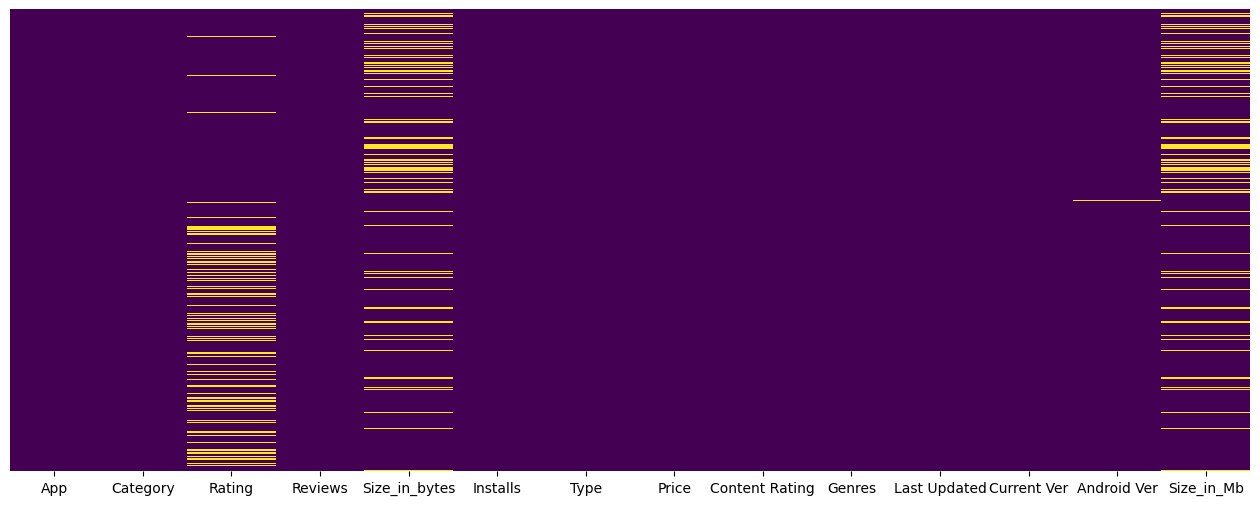

In [55]:
# make a figure size
plt.figure(figsize=(16,6))
#plot the null values in each column
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap= 'viridis')

- There is another way, let's plot the missing values by percentage.

Text(0.5, 1.0, 'Percentage of missing values ineach column')

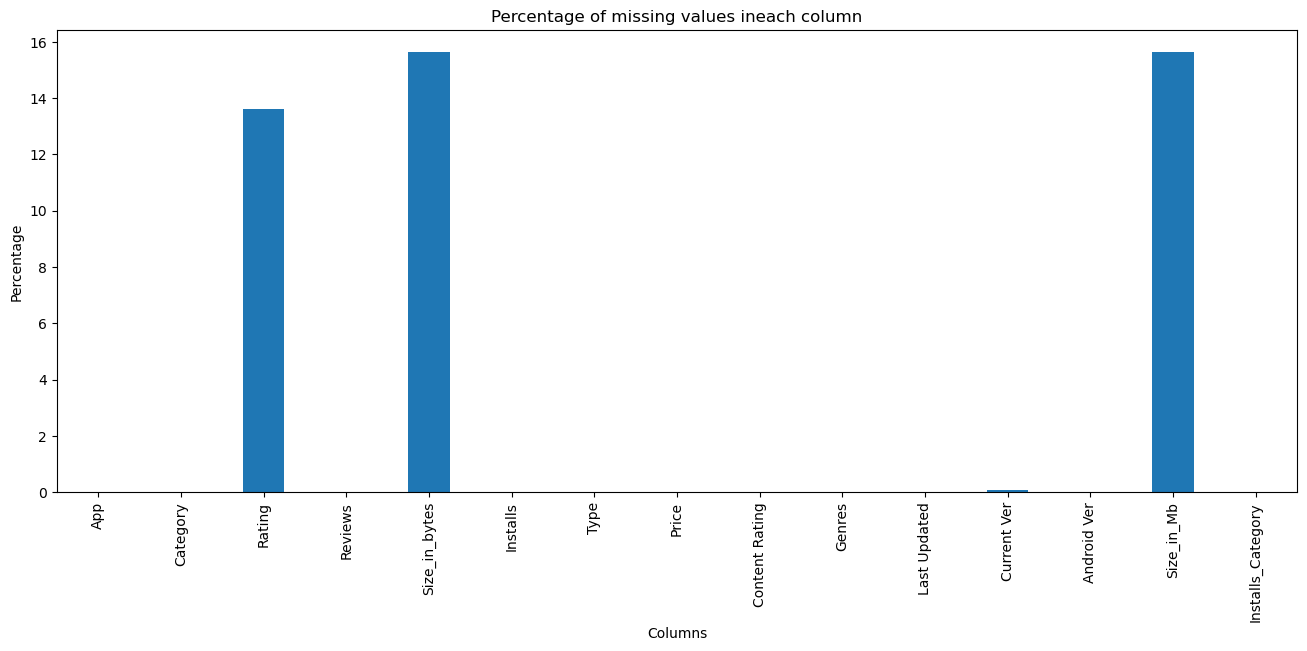

In [65]:
#make figure size
plt.figure(figsize=(16,6))
# plot the null values by percentage in each column
missing_percentage= df.isnull().sum()/len(df)*100
missing_percentage.plot(kind = 'bar')
# add labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of missing values ineach column')

- Let's plot the missing values other than 'Rating', 'Size in bytes' and 'Size in Mb' column.
- We have missing percentage columns that have lass than 1%of missing values, therefore  we will plot columns with values greater than 1%

Text(0.5, 1.0, 'Percentage of missing values in each column')

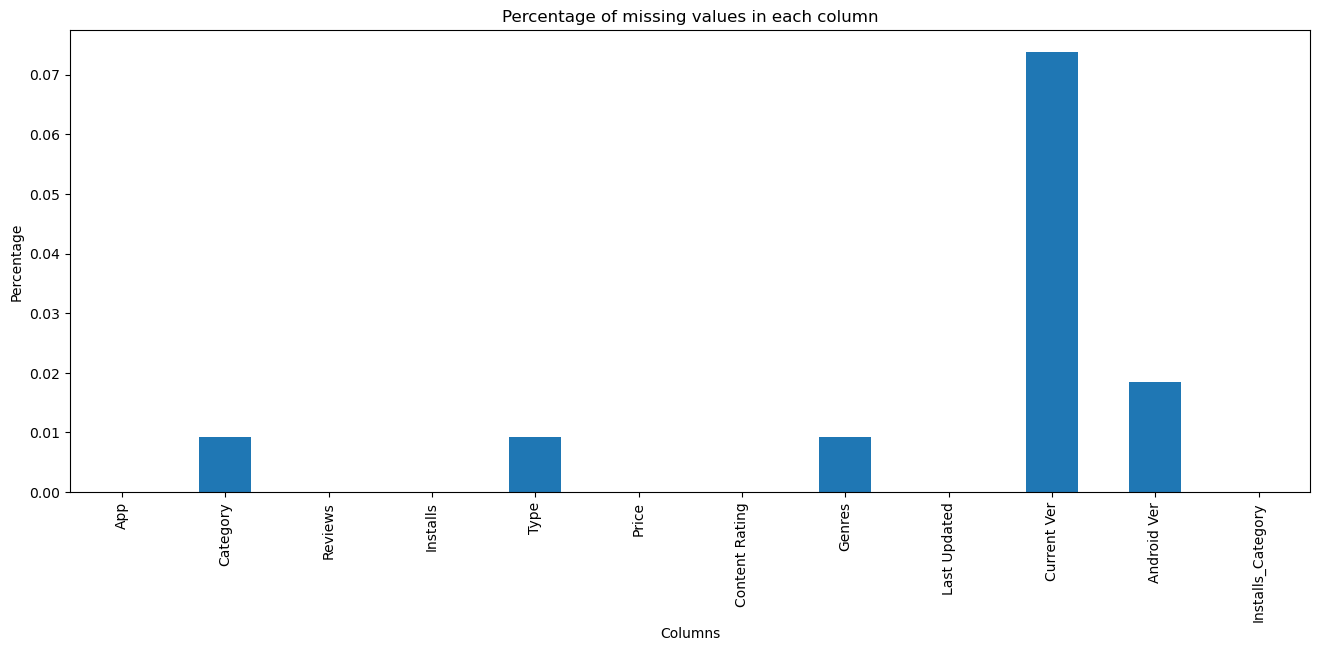

In [67]:
#make figure size
plt.figure(figsize=(16,6))
# plot the null values by percentage in each column
missing_percentage= df.isnull().sum()/len(df)*100
missing_percentage[missing_percentage<1].plot(kind = 'bar') #plot the null values
# add labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of missing values in each column')

In [70]:
df.isnull().sum().sort_values(ascending = False)# this will show the number of null values in each column in descending order

Size_in_bytes        1695
Size_in_Mb           1695
Rating               1474
Current Ver             8
Android Ver             2
Category                1
Type                    1
Genres                  1
App                     0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Last Updated            0
Installs_Category       0
dtype: int64

In [64]:
#this will show the percentage of null values in each column
(df.isnull().sum()/ len(df) * 100).sort_values(ascending=False)

Size_in_bytes        15.635089
Size_in_Mb           15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.018448
Category              0.009224
Type                  0.009224
Genres                0.009224
App                   0.000000
Reviews               0.000000
Installs              0.000000
Price                 0.000000
Content Rating        0.000000
Last Updated          0.000000
Installs_Category     0.000000
dtype: float64

In [68]:
df.isnull().sum().sort_values(ascending=False) # this will show the number of null values

Size_in_bytes        1695
Size_in_Mb           1695
Rating               1474
Current Ver             8
Android Ver             2
Category                1
Type                    1
Genres                  1
App                     0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Last Updated            0
Installs_Category       0
dtype: int64

# Observations:
---
- We have 1695 missing values in the 'Size_in_bytes' and 'Size_in_Mb' columns, which is 15.6% of the total values in the column.
- We have 1474 missing values in the 'Rating' column, which is 13.6% of the total values in the column.
- We have 8 missing value in the 'Current Ver' column, which is 0.07% of the total values in the column.
- We have 2 missing value in the 'Android Ver' column, which is 0.01% of the total values in the column.

### 2.3 Dealing with missing values
- We can not impute the Rating column as it is directly linked with the installation column. To test this hypothesis we need to plot the Rating column with the Installs and Size columns and statistically test it using pearson correlation test.
---
- Let's run the correlations

In [71]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


<Axes: >

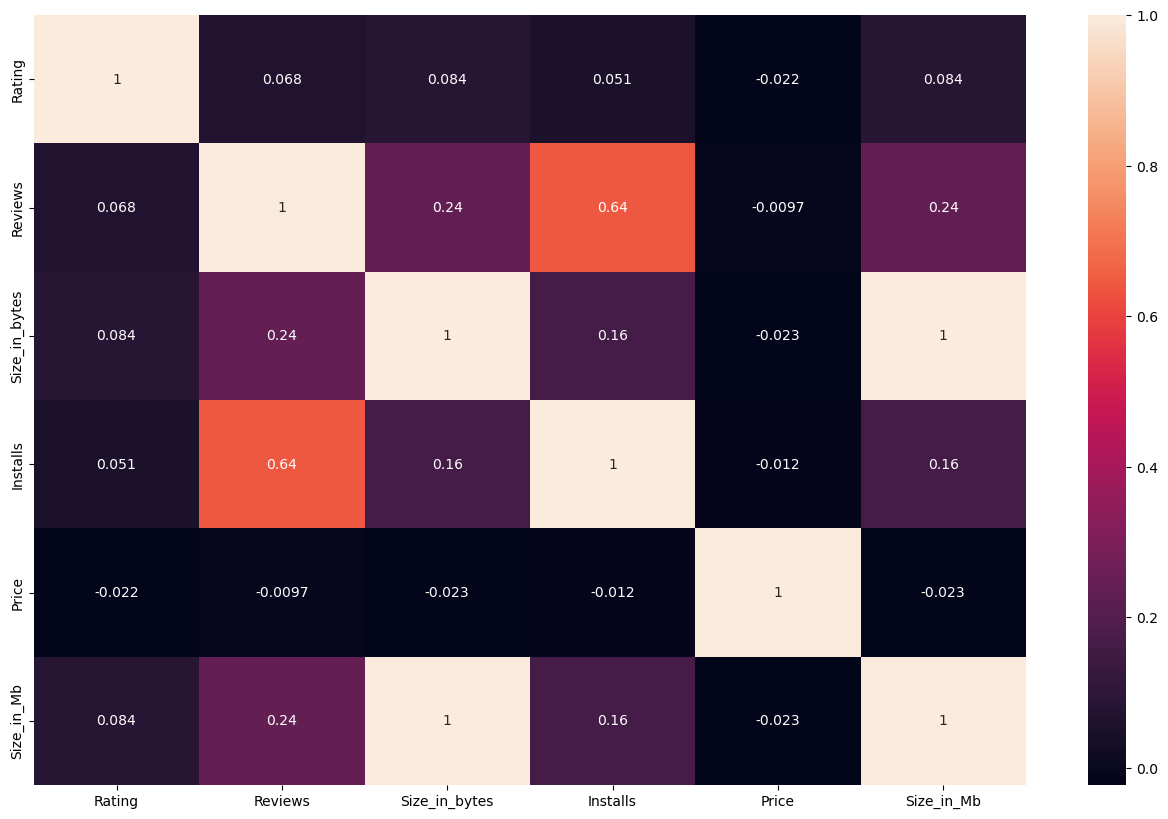

In [73]:
# Make a correlation matrix of numeric columns
plt.figure(figsize=(16, 10)) # make figure size
numeric_cols = ['Rating', 'Reviews', 'Size_in_bytes', 'Installs', 'Price', 'Size_in_Mb'] # make a list of numeric columns
sns.heatmap(df[numeric_cols].corr(), annot = True) #plot the correlation matrix

In [74]:
# we can also calculate correlation matrix using pandas
df[numeric_cols].corr() # this will show the correlation matrix

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851,0.084098
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666,0.238218
Size_in_bytes,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688,0.164794
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000,-0.023000
Size_in_Mb,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000


In [75]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [76]:
# we can calculate pearson correlation coefficient using scipy as well as follows
from scipy import stats
#remove rows with null and inf values
df_clean = df.dropna()
#calculate pearson's R between rating and installs
pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

Pearson's R between Reviews and Installs: 0.6262


---
# Observations 
- Lighter Color shows higher correlation and darker color shows low correlation
- We can see that Reviews column has a high correlation with the install column, which is 0.64.
    - This shows that the more the reviews, the more the installs are there of the app. If we ever need to impute reviews, install can be used.
    - If an app has 2 installs we can't impute the ratings with 1000 as it will be wrong.
- Installs is also slightly correlated with Size_in_bytes, but the pearson correlation factor is very low(0.16), therefore we cannot depend on it to fill the missing values.
---
- Before going ahead, let's remove the rows with missing values in the Current ver, Android ver, Category, Type and Genre columns, as they are very less in number and won't affect our analysis.

In [77]:
# length of df before removing null values
print(f"The length of dataframe before removing null values: {len(df)}")

The length of dataframe before removing null values: 10841


In [78]:
# remove the rows with missing values in the 'Current ver', 'Android ver', 'Category', 'Type' and 'Genre' columns
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'],inplace= True)

In [79]:
# length of df after removing null values
print(f"The length of dataframe after removing null values: {len(df)}")

The length of dataframe after removing null values: 10829


- We have removed 12 rows having null values in the 'Current ver', 'Android ver', 'Category', 'Type' and 'Genre' columns

In [80]:
df.isnull().sum().sort_values(ascending= False)

Size_in_bytes        1694
Size_in_Mb           1694
Rating               1469
App                     0
Category                0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_Category       0
dtype: int64

# Observations
- Only rating and Size_in_bytes or Size_in_Mb are left with missing values.
    - We have to be careful while dealing with the  ratings column, as it is directly related to the installs column.
    - In size Columns, we already know about "Varies with device" values, which we have already converted to NULL, we do not need to impute at the moment as App Size cannot be predicted with good accuracy.

In [81]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Installs_Category'],
      dtype='object')

In [94]:
df['Rating'].isnull().sum()

1469

In [89]:
# use groupby function to find the trend of Rating in each Installs_category
df.groupby('Installs_Category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_Category,,,,,,,,
No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very Low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than Moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


# Replacing missing values in Rating based on average values in Installs Category

In [90]:
# null rating values categorised by Installs_category
df['Installs_Category'].loc[df['Rating'].isnull()].value_counts()

Low                   880
Very Low              453
Moderate               88
More than Moderate     31
No                     14
High                    3
Very High               0
Top Notch               0
Name: Installs_Category, dtype: int64

In [129]:
df.groupby('Installs_Category')['Rating'].mean()

Installs_Category
No                         NaN
Very Low              4.637037
Low                   4.170970
Moderate              4.035417
More than Moderate    4.093255
High                  4.207525
Very High             4.287076
Top Notch             4.374396
Name: Rating, dtype: float64

In [127]:
# grouping rating based on installs category and replacing each value in each group by the mean in each group
# We'll have to impute "No" Installs_Category group in the next command as it's mean is NULL
df['Rating']= df.groupby('Installs_Category')['Rating'].apply(lambda x: x.fillna(x.mean()))

In [124]:
df['Rating'].isnull().sum()
# now we have to deal with the rating values of "No" Installs Category and replace them with 0

1469

In [130]:
df['Rating'] = df['Rating'].fillna()

In [140]:
print(df.groupby('Installs_Category')['Rating'].mean())
print(f"The number of null values in rating column is: {df['Rating'].isnull().sum()}")

Installs_Category
No                    0.000000
Very Low              4.637037
Low                   4.170970
Moderate              4.035417
More than Moderate    4.093255
High                  4.207525
Very High             4.287076
Top Notch             4.374396
Name: Rating, dtype: float64
The number of null values in rating column is: 0


- Let's plot and have a look

Text(7, 3.5, 'Null Values; 0')

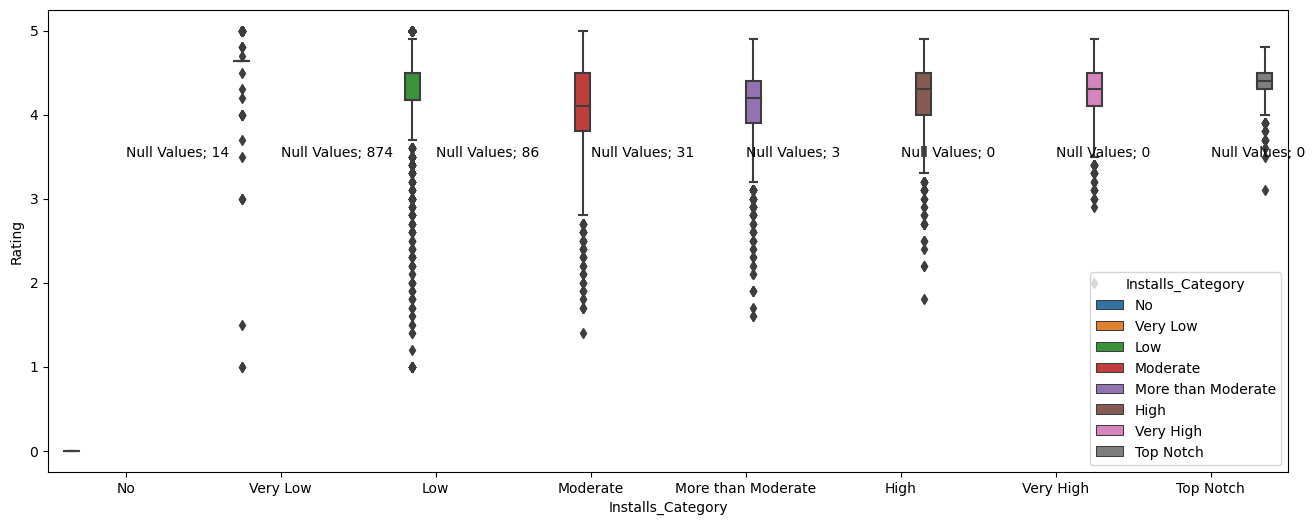

In [141]:
#plot the boxplot of rating in each installs_category
plt.figure(figsize=(16,6)) # make figure size
sns.boxplot(x='Installs_Category', y= 'Rating', hue='Installs_Category', data=df) # plot the boxplot
# add the text of number of null values in each category
plt.text(0,3.5, 'Null Values; 14')
plt.text(1,3.5, 'Null Values; 874')
plt.text(2,3.5, 'Null Values; 86')
plt.text(3,3.5, 'Null Values; 31')
plt.text(4,3.5, 'Null Values; 3')
plt.text(5,3.5, 'Null Values; 0')
plt.text(6,3.5, 'Null Values; 0')
plt.text(7,3.5, 'Null Values; 0')

- Let's check whether there is any link with reviews as well

In [96]:
# In which install category rating has NULL values
df['Installs_Category'].loc[df['Reviews'].isnull()].value_counts()

No                    0
Very Low              0
Low                   0
Moderate              0
More than Moderate    0
High                  0
Very High             0
Top Notch             0
Name: Installs_Category, dtype: int64

- There are no NULL values in reviews

<Axes: xlabel='Installs_Category', ylabel='Reviews'>

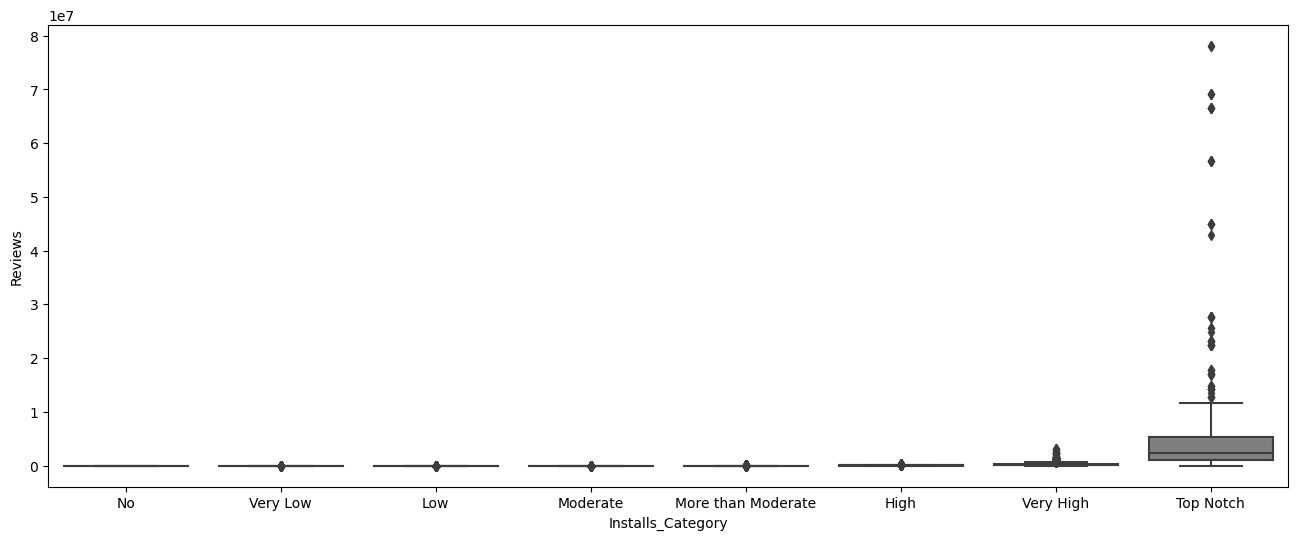

In [142]:
# Let's plot the same plots for reviews column as well
plt.figure(figsize=(16,6)) #make figure size
sns.boxplot(x = 'Installs_Category', y = 'Reviews', data = df)

- The data looks imbalanced, Let's normalise it usinf log Transformation

<Axes: xlabel='Installs_Category', ylabel='Reviews'>

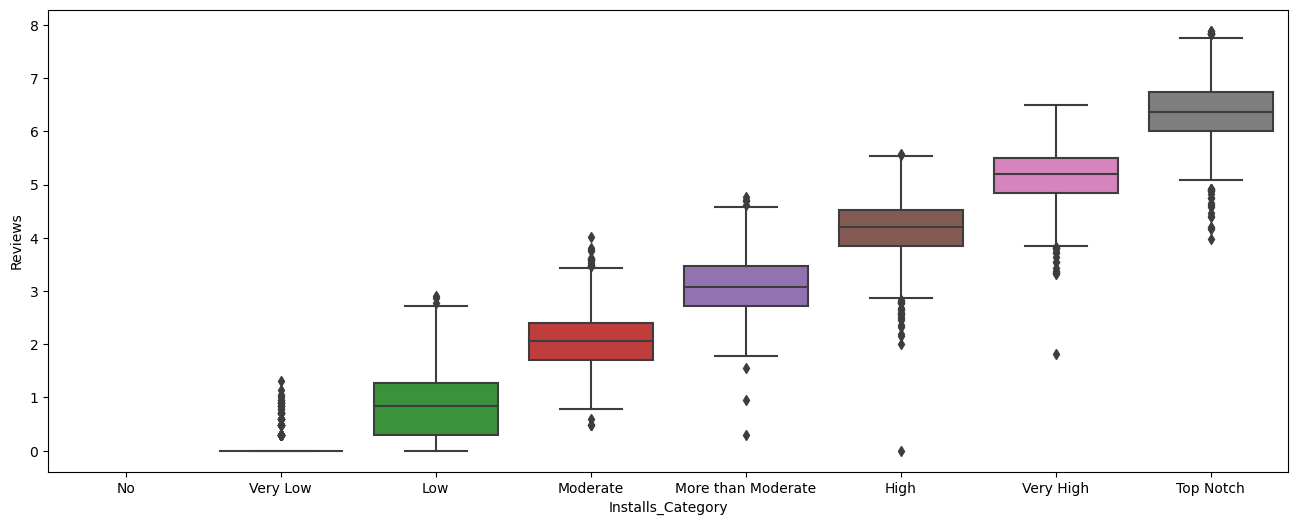

In [144]:
plt.figure(figsize=(16,6)) #make figure size
sns.boxplot(x = 'Installs_Category', y = np.log10(df['Reviews']), data = df)

- We also draw the scatter plot between Rating, Reviews and Installs_Category 

<Axes: xlabel='Rating', ylabel='Reviews'>

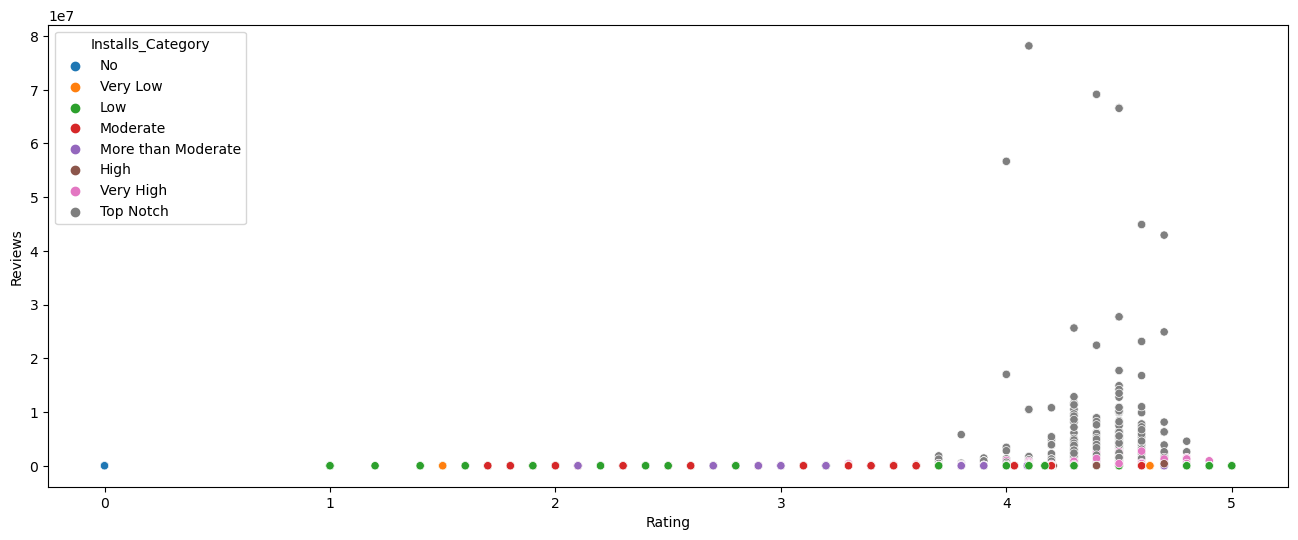

In [145]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16,6)) # make figure size
sns.scatterplot(x='Rating', y='Reviews', hue='Installs_Category', data = df)

- It doesn't show any trend, because, you should know that Rating is a categorical variable(Ordinal, containing groups or categories) and Rating is a continuous variable, therefore, we can't plot them together.
- Let's try with Reviews and Installs

<Axes: xlabel='Reviews', ylabel='Installs'>

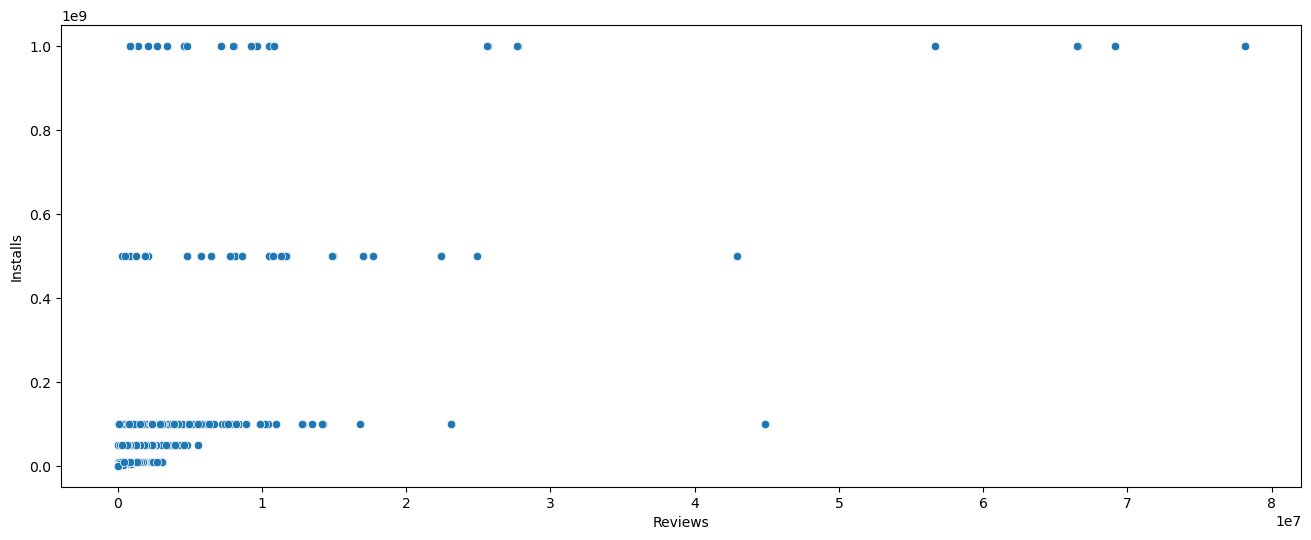

In [146]:
#scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot(x='Reviews', y='Installs', data = df)

- We don't see any trend, the scale needs to be adjusted(normalisation) so we will take log of both variables before plotting.

<Axes: xlabel='Reviews', ylabel='Installs'>

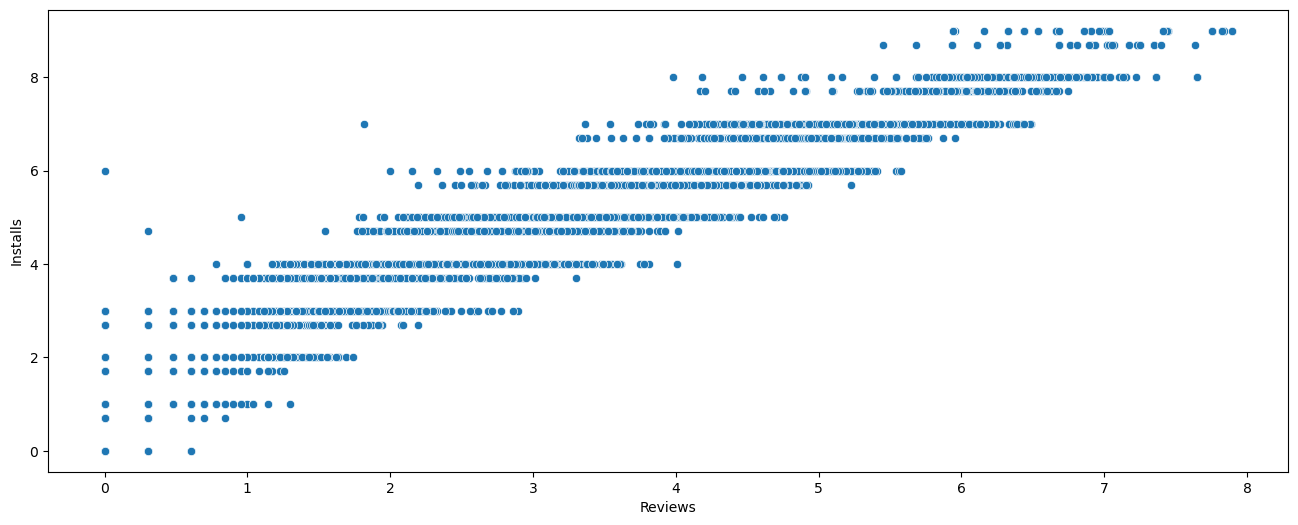

In [148]:
#scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data = df)

- Now we see a slight trend but still the issue is Installs were given in a factorial manner, as 10+, 20+, 1000+ etc, and these are not **continuous**(numeric variables that have an infinite number of values between any two values) number but **discrete** one(numeric variables that have a countable number of values between any two values), therefore we can only see a slight trend here. Let's plot a line plot to see the trend.

<Figure size 1600x600 with 0 Axes>

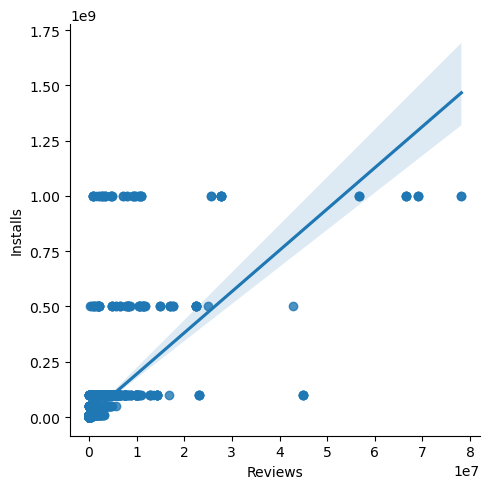

In [150]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize = (16,6))
sns.lmplot(x='Reviews', y='Installs', data=df)

- Here, we can clearly observe the trend, which shows that the number of reviews increases with the number of installs, which was also quite obvious.

--- 
# Observation
- We can see that most of the null values from rating column are No-Moderate Installation Apps, which makes sense that if the app has less Installations, it has less Rating and Reviews.
- But, we should check the duplicate values too, as they affect our analysis.

# 2.3 Duplicates
- Removing duplicates is one of the most important step of the Data Wrangling process, we must remove the duplicates in order to get the correct insights from the data.
- If you don't remove duplicates from a dataset, it can lead to incorrect insights and analysis.
- Duplicates can skew statistical measures such as mean, median and standard deviation, and can also lead to over-represetation of certain data points.
- It is important to remove duplicates to ensure the accuracy and reliability of data analysis.

In [152]:
df.duplicated().sum()

483

This shows us total duplicates, but we can also check based on the app name, as every app has a unique name.

In [154]:
df['App'].duplicated().sum()

1181

- Oops! we have 1181 duplicate app names
- Can we find a column which can help us to remove the duplicates?

Let's check for the number of duplicates in each column using a for loop and printing the output

In [156]:
for col in df.columns:
    print(f"The number of duplicates in {col} column are: {df[col].duplicated().sum()}")

The number of duplicates in App column are: 1181
The number of duplicates in Category column are: 10796
The number of duplicates in Rating column are: 10784
The number of duplicates in Reviews column are: 4830
The number of duplicates in Size_in_bytes column are: 10373
The number of duplicates in Installs column are: 10809
The number of duplicates in Type column are: 10827
The number of duplicates in Price column are: 10737
The number of duplicates in Content Rating column are: 10823
The number of duplicates in Genres column are: 10710
The number of duplicates in Last Updated column are: 9453
The number of duplicates in Current Ver column are: 8046
The number of duplicates in Android Ver column are: 10796
The number of duplicates in Size_in_Mb column are: 10373
The number of duplicates in Installs_Category column are: 10821


This means that the only better way to find the duplicates is to check for the whole data

In [157]:
print(f"Number of duplicates in df are: {df.duplicated().sum()}")

Number of duplicates in df are: 483


In [158]:
df[df['App'].duplicated(keep= False)].sort_values(by='App')

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_Category
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.000000,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.800000,High
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.000000,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.800000,High
2543,1800 Contacts - Lens Store,MEDICAL,4.700000,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.000000,High
2322,1800 Contacts - Lens Store,MEDICAL,4.700000,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.000000,High
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.400000,12,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.800000,Low
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.400000,12,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.800000,Low
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.400000,11506,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,15.000000,More than Moderate
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.400000,11506,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,15.000000,More than Moderate
3083,365Scores - Live Scores,SPORTS,4.600000,666521,26214400.0,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,25.000000,Very High
5415,365Scores - Live Scores,SPORTS,4.600000,666246,26214400.0,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,25.000000,Very High


- Remove Duplicates

In [160]:
df.drop_duplicates(inplace=True)

In [161]:
# Number of rows after removing duplicates
print(f"The number of rows after removing duplicates: {df.shape[0]}")

The number of rows after removing duplicates: 10346


- We have removed 483 rows from the dataset and have 10346 rows left.

---
# 3. Insights from Data

# 3.1 Which Category has the highest number of Apps 


In [163]:
# Which category has the highest number of apps
df['Category'].value_counts().head(10)

FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: Category, dtype: int64

# 3.2 Which Category has the highest number of Installs

In [164]:
df.groupby('Category')['Installs'].sum().sort_values(ascending= False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

# 3.3 Which categary has the highest number of reviews

In [165]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending= False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

# 3.4 Which Category has the highest Rating

In [167]:
# Categoris with the highest average rating
df.groupby('Category')['Rating'].mean().sort_values(ascending = False).head(10)

Category
EVENTS                 4.394346
EDUCATION              4.373794
BOOKS_AND_REFERENCE    4.358435
PERSONALIZATION        4.322099
ART_AND_DESIGN         4.298885
GAME                   4.281926
HEALTH_AND_FITNESS     4.273890
PARENTING              4.259759
SHOPPING               4.253376
SPORTS                 4.253041
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

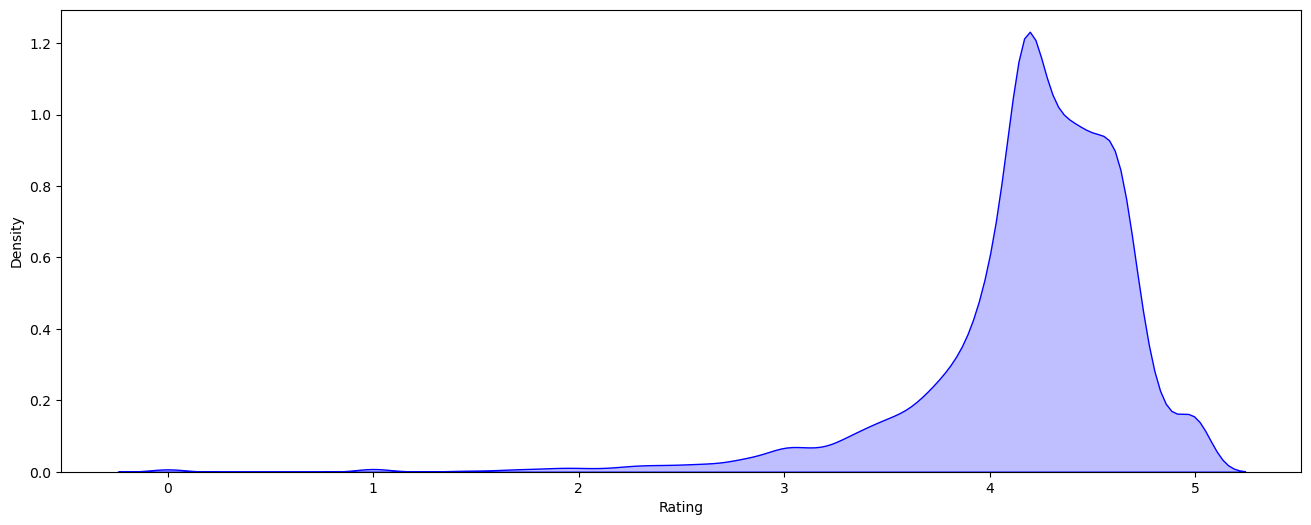

In [168]:
#plot the rating distribrution
plt.figure(figsize=(16,6))
sns.kdeplot(df['Rating'], color = 'blue', shade = True)

<Axes: xlabel='Installs', ylabel='Price'>

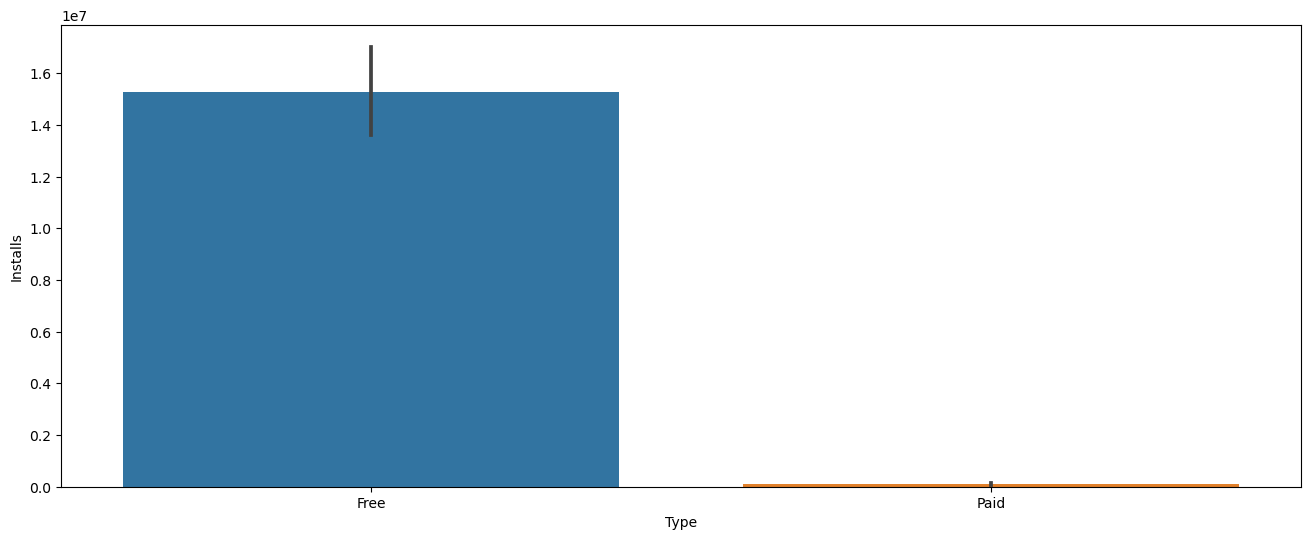

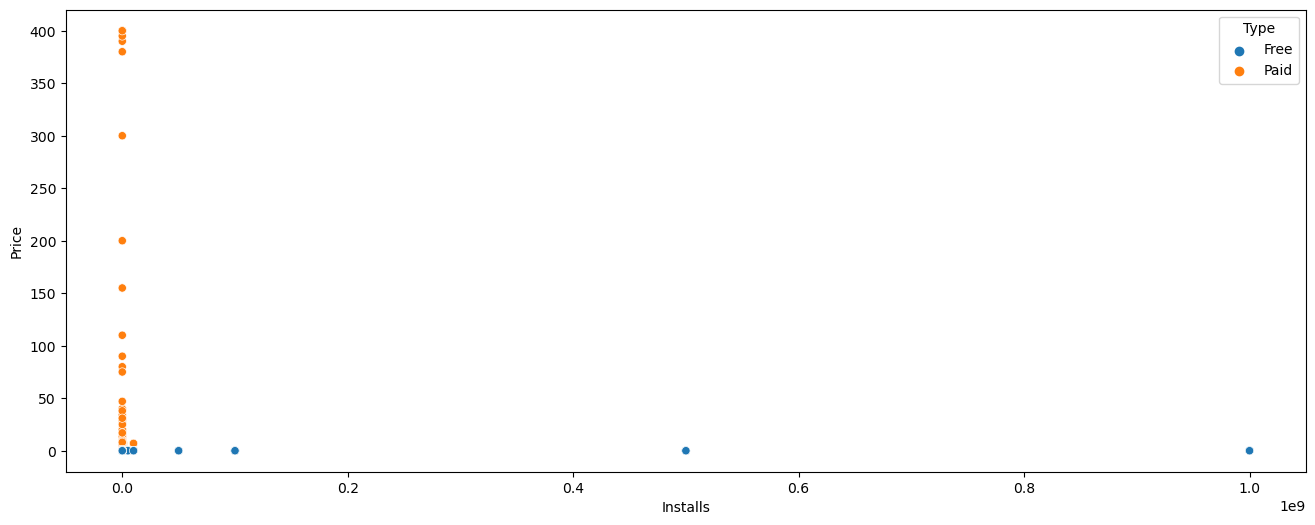

In [174]:
#plotting a bar plot for the number of installs for free v/s paid apps
plt.figure(figsize=(16,6))
sns.barplot(x='Type', y='Installs', data = df)
# scatter plot where x-axis is Installs and y-axis is Price and hue is Type
plt.figure(figsize=(16,6))
sns.scatterplot(x=df['Installs'], y='Price', hue='Type', data=df)

<Axes: xlabel='Installs_Category', ylabel='Size_in_Mb'>

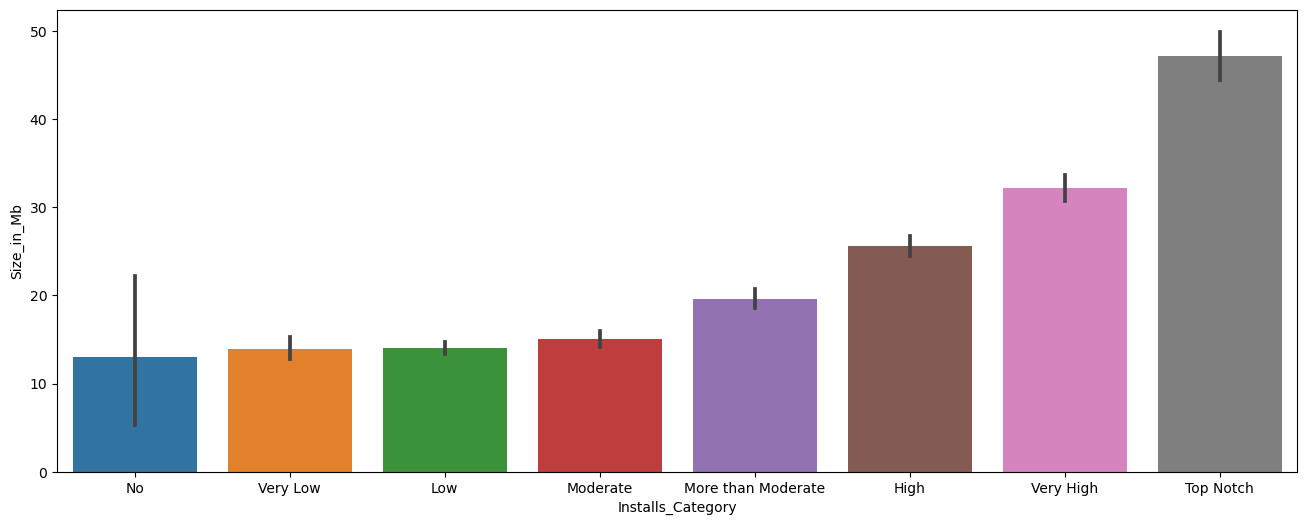

In [175]:
# Check if there is any impact of size on installs
# make a bar plot of Size_in_mb vs Installs_Category
sns.barplot(x='Installs_Category', y='Size_in_Mb', data = df)

In [176]:
# Which content rating is most popular in installs
df['Content Rating'].value_counts()

Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

<Axes: xlabel='Content Rating', ylabel='Installs'>

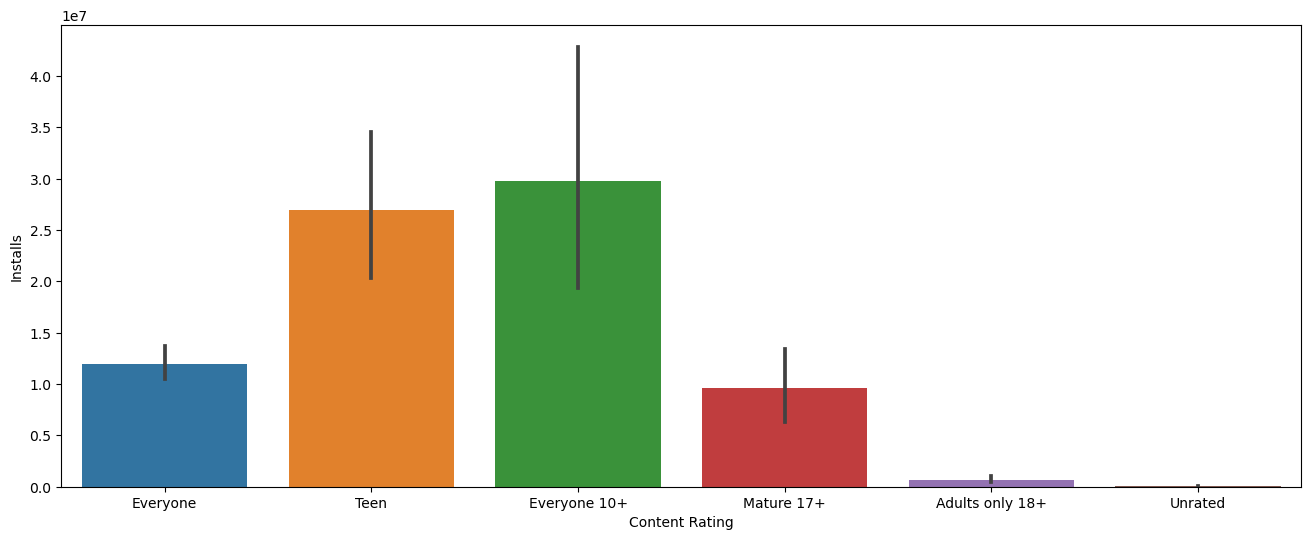

In [187]:
#plot the barplot of Content Rating v/s Installs
plt.figure(figsize=(16,6))
sns.barplot(x='Content Rating', y = 'Installs', data =  df)

In [182]:
# find the number of apps in each category in everyone rating
df['Category'].loc[df['Content Rating']=='Everyone'].value_counts()

FAMILY                 1498
TOOLS                   833
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           325
PERSONALIZATION         318
SPORTS                  318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
HOUSE_AND_HOME           78
WEATHER                  78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: Category, dtype: int64

<Axes: xlabel='App', ylabel='Rating'>

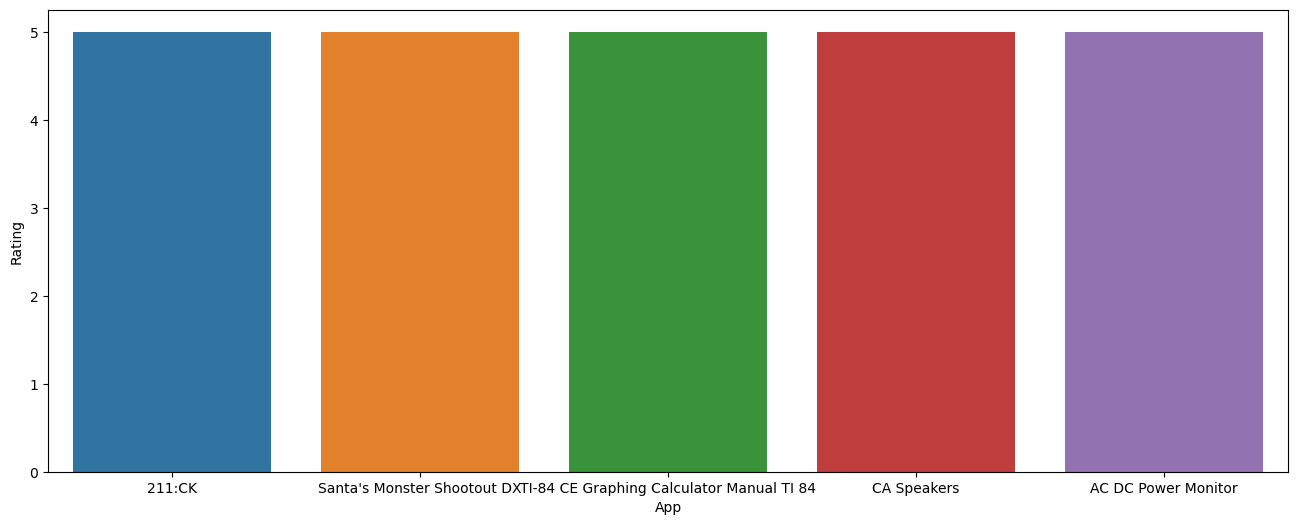

In [186]:
# plot top 5 rated paid apps
plt.figure(figsize=(16,6))
sns.barplot(x='App', y='Rating', data = df[df['Type']=='Paid'].sort_values(by = 'Rating', ascending = False).head(5))

<Axes: xlabel='App', ylabel='Rating'>

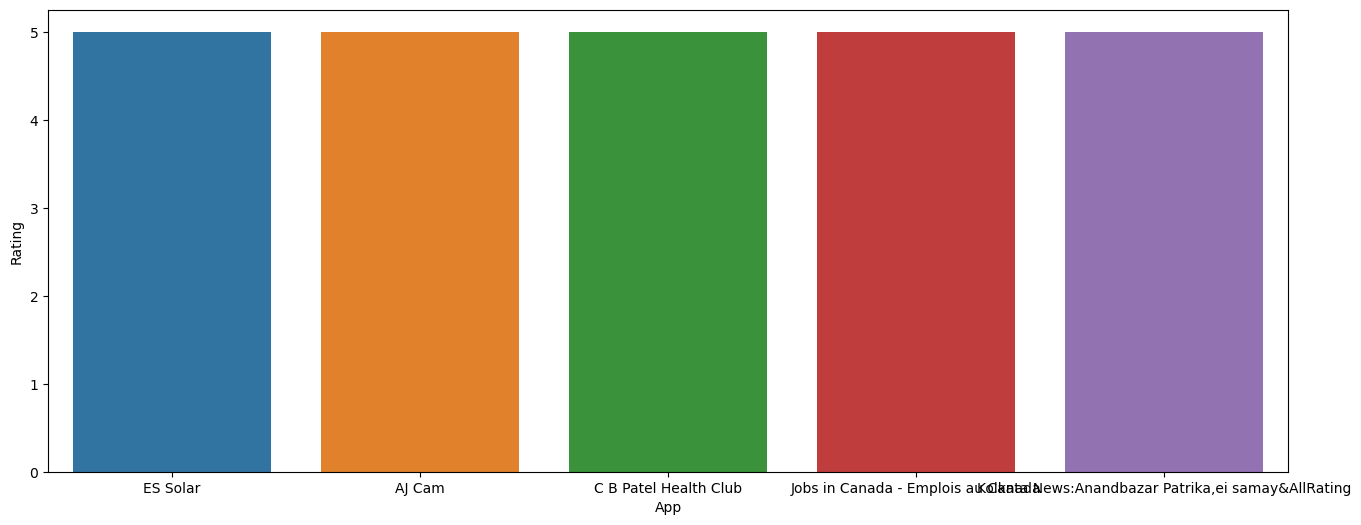

In [200]:
# plot top rated 5 apps in free category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot( x='App', y='Rating', data=df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

In [202]:
df[df['Type']=='Paid'].sort_values(by='Rating', ascending = False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_Category
7466,211:CK,GAME,5.0,8,39845888.0,10,Paid,0.99,Teen,Arcade,"April 11, 2018",1.3,4.1 and up,38.0,Very Low
9056,Santa's Monster Shootout DX,GAME,5.0,4,34603008.0,50,Paid,1.99,Teen,Action,"August 15, 2013",1.05,2.2 and up,33.0,Low
7204,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.0,1,28311552.0,100,Paid,4.99,Everyone,Education,"March 28, 2018",1.5.2,4.1 and up,27.0,Low
7100,CA Speakers,LIFESTYLE,5.0,12,1258291.2,100,Paid,0.99,Teen,Lifestyle,"March 25, 2014",1,3.0 and up,1.2,Low
8287,AC DC Power Monitor,LIFESTYLE,5.0,1,1258291.2,10,Paid,3.04,Everyone,Lifestyle,"May 29, 2016",1.2,2.3 and up,1.2,Very Low


<Axes: xlabel='App', ylabel='Reviews'>

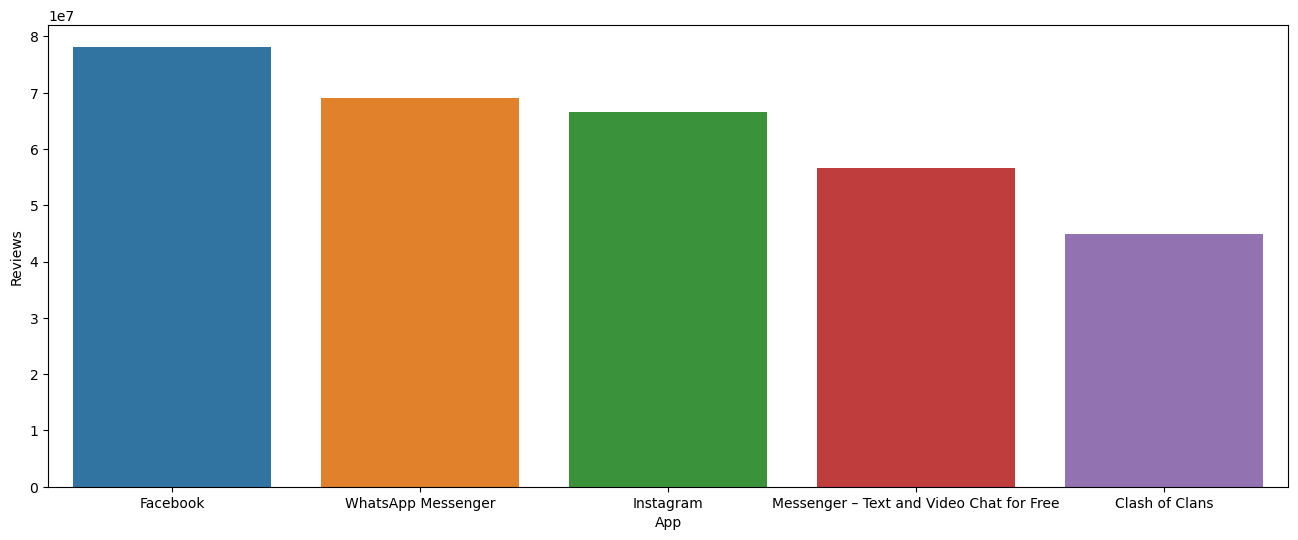

In [209]:
# Top 5 free apps with highest reviews
plt.figure(figsize=(16,6))
sns.barplot(x='App', y='Reviews', data = df[df['Type']=='Free'].sort_values(by = 'Reviews', ascending = False).head(10))

In [210]:
df[df['Type']=='Free'].sort_values(by = 'Reviews', ascending = False).head(10)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_Category
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
3943,Facebook,SOCIAL,4.1,78128208,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
2604,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,NaN,Top Notch
2545,Instagram,SOCIAL,4.5,66577313,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,NaN,Top Notch
3909,Instagram,SOCIAL,4.5,66509917,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,NaN,Top Notch
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,NaN,Top Notch
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,NaN,Top Notch
1879,Clash of Clans,GAME,4.6,44893888,102760448.0,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,98.0,Top Notch


---
# Completed!